# EDA

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = '../../'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

No incluyo la variable 'd' ya que va a tener demasiados valores.

In [5]:
cat.columns.to_list()

['warehouse_id',
 'item_id',
 'd',
 'year',
 'month',
 'wday',
 'weekday',
 'event_name_1',
 'event_type_1']

In [6]:
incluir = cat.columns.to_list()
del incluir[2]

In [7]:
cat[incluir].dtypes

warehouse_id    object
item_id         object
year            object
month           object
wday            object
weekday         object
event_name_1    object
event_type_1    object
dtype: object

In [8]:
def frecuencias_cat(df_cat):
    melted_df = pd.melt(df_cat, var_name='Variable', value_name='Valor')
    total_filas = len(melted_df)
    resultado = melted_df.groupby(['Variable', 'Valor']).size().reset_index(name='Frecuencia')
    resultado['Frecuencia'] = resultado['Frecuencia'] / total_filas * 100
    resultado = resultado.sort_values(by=['Variable', 'Frecuencia'], ascending=[True, False])

    return resultado

In [9]:
pd.set_option('display.max_rows', None)

frecuencias_cat(cat[incluir])

,Variable,Valor,Frecuencia
25,event_name_1,Sin_evento,11.501410
3,event_name_1,ColumbusDay,0.035244
4,event_name_1,Easter,0.035244
5,event_name_1,Eid al-Fitr,0.035244
6,event_name_1,EidAlAdha,0.035244
8,event_name_1,Halloween,0.035244
9,event_name_1,IndependenceDay,0.035244
10,event_name_1,LaborDay,0.035244
11,event_name_1,LentStart,0.035244
12,event_name_1,LentWeek2,0.035244


Nada relevante a comentar

In [10]:
pd.set_option('display.max_rows', 6)

### Análisis gráfico

In [11]:
def graficos_eda_categoricos(cat):
    from math import ceil
    filas = ceil(cat.shape[1] / 2)
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))
    ax = ax.flat 

    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

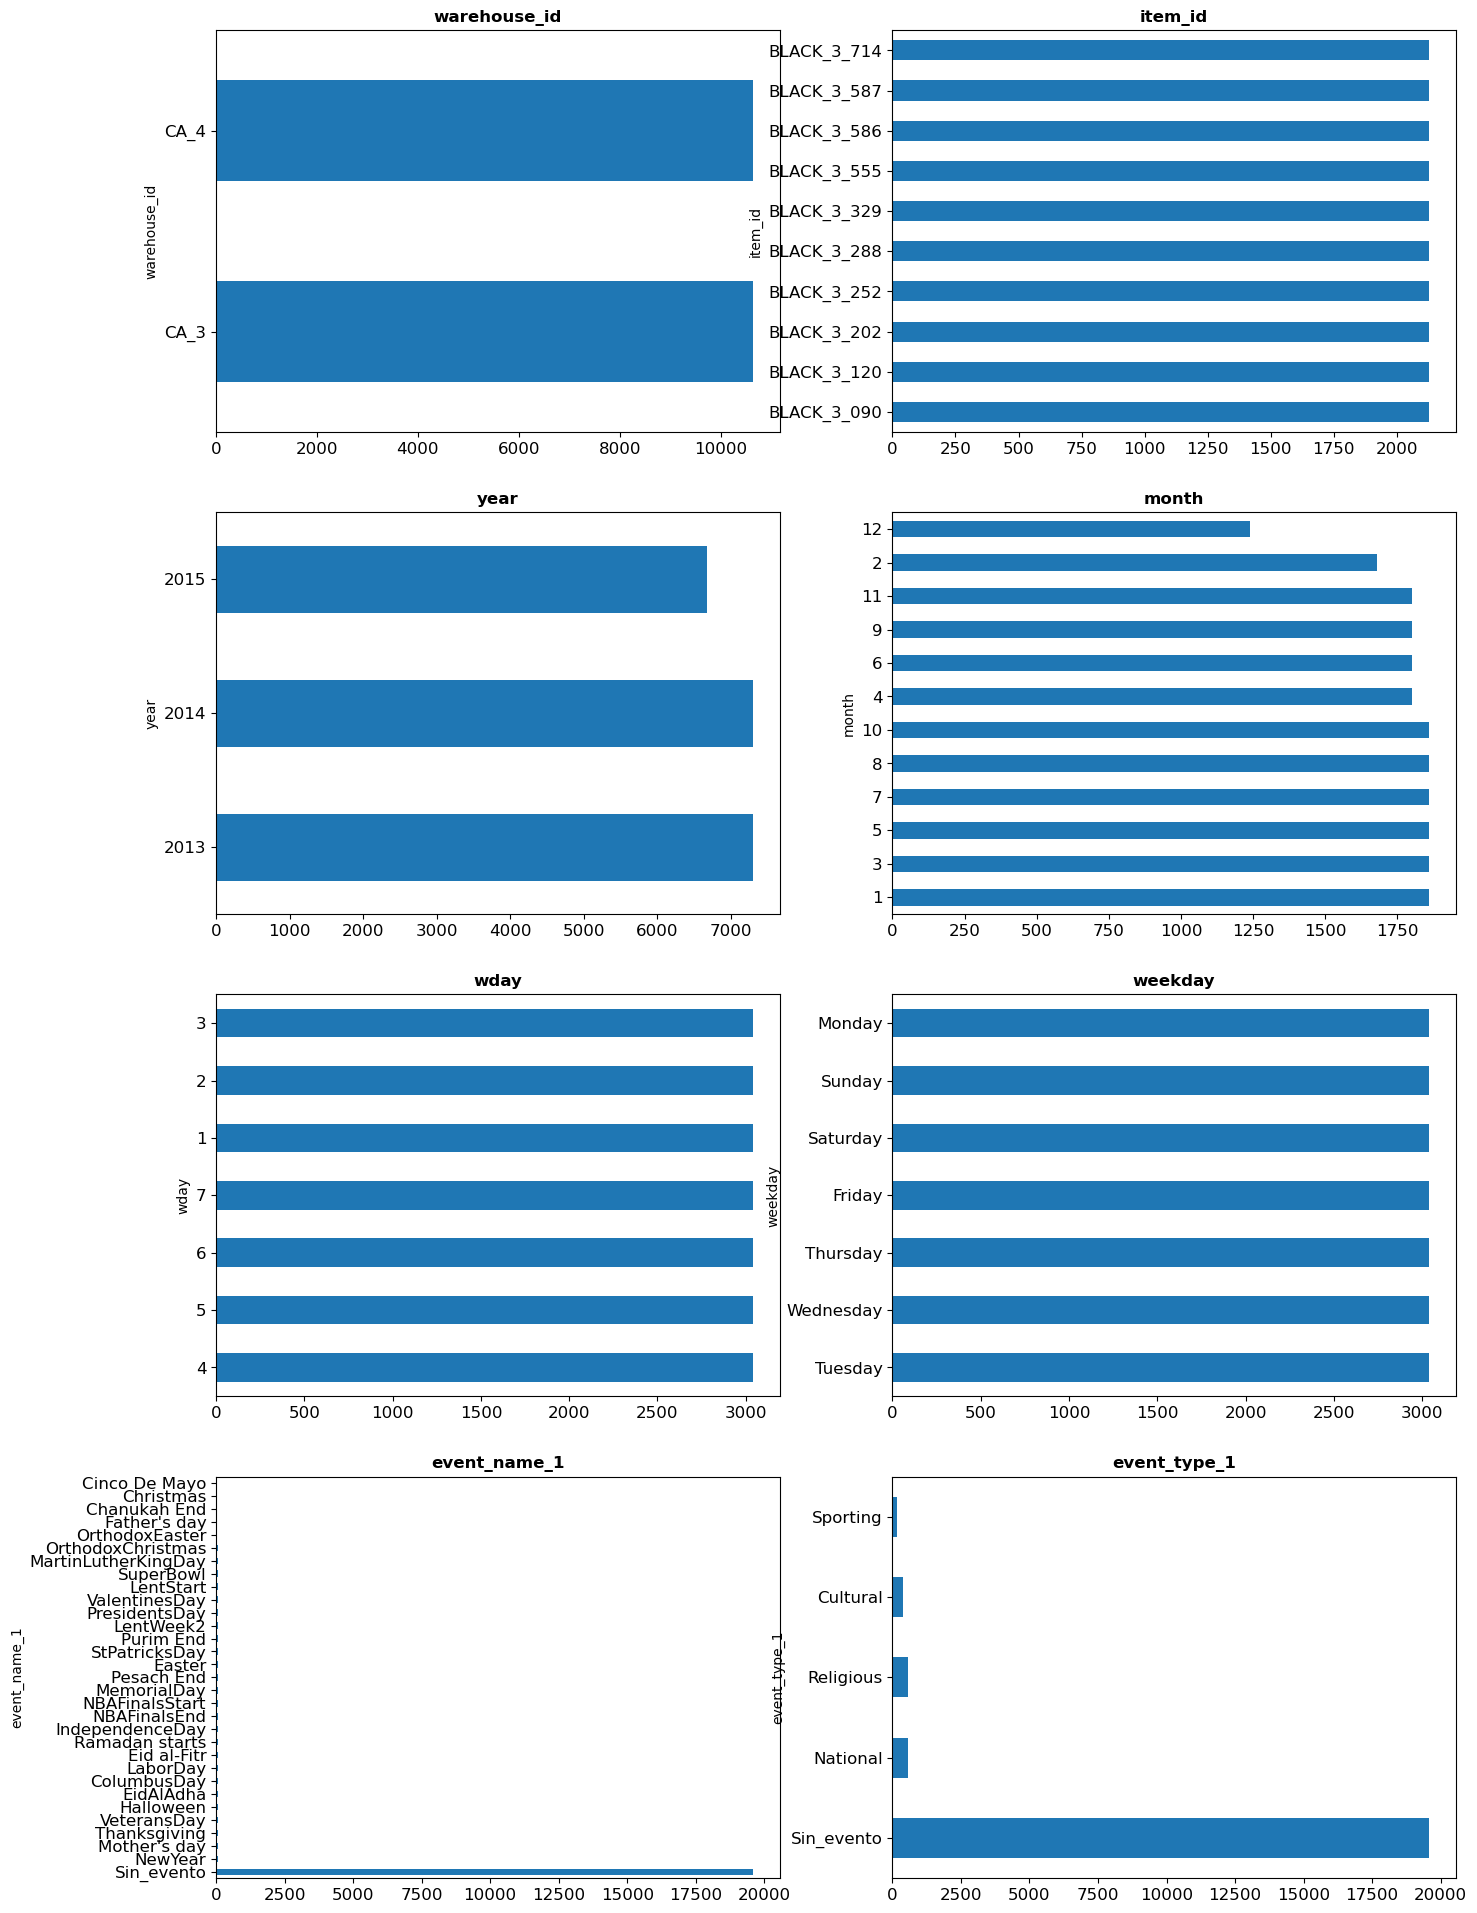

In [12]:
graficos_eda_categoricos(cat[incluir])

Sale conclusiones que ya habia visto en la parte de calidad de datos como el numero de registros que tengo para los meses o años que son igual salvo en uno, pero el motivo...

Entonces nada nuevo, sigo

## EDA NUMÉRICAS

### Análisis estadístico

In [13]:
def estadisticos_cont(num):
    estadisticos = num.describe().T
    estadisticos['median'] = num.median()
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(estadisticos)

In [14]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,11420.00,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
ventas,21280.0,28.874577,18.00,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21209.0,2.397254,1.58,1.237024,1.0,1.5,1.58,2.98,4.98


### Análisis gráfico

En este caso el análisis gráfico que tiene más sentido es el de ventas y precios por diferentes dimensiones.

Así que primero voy a volver a unir los dos dataframes.

In [15]:
df = pd.concat([cat,num], axis=1)

df.head()

,warehouse_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1,wm_yr_wk,ventas,sell_price
date,,,,,,,,,,,,
2013-01-01,CA_3,BLACK_3_090,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,1.25
2013-01-01,CA_3,BLACK_3_120,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,BLACK_3_202,d_704,2013,1,4,Tuesday,NewYear,National,11249,20,4.28
2013-01-01,CA_3,BLACK_3_252,d_704,2013,1,4,Tuesday,NewYear,National,11249,34,1.48
2013-01-01,CA_3,BLACK_3_288,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,NaN


Tengo una estructura de tienda y producto que en este caso tengo que hacer una selección de las dos tiendas y 10 productos para poder hacer el análisis en esto. En el caso real con los datos reales de la empresa priorizo los productos y tiendas mas importantes.

Aqui empieza el primer gran reto, tengo que decidir a que nivel debo modelizar.

Puedo decidir:

* Tienda
* Producto
* Categoria
* Dia
* Semana

El que decida, da igual cual, me genera otro problema que si quiero modelizar a diferentes niveles, cuando uno esas modelizaciones para diferentes departamentos con diferentes objetivos de negocio, puedes interesar a una jerarquia u otra. Por ejemplo a Produccion le puede interesar a nivel de Categoria, pero a Logistica le interesa mas a nivel de Producto.

#### Tendencia global de las ventas

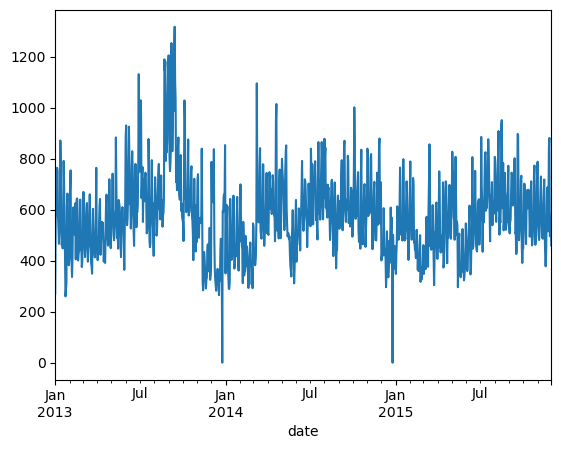

In [16]:
df.groupby('date').ventas.sum().plot();

* La demanda es bastante estable
* En agosto de 2013 hay un pico de alta demanda, habria que ver con alguien que sepa del negocio porque. Esta situacion atipica se le deberia añadir un indicador para que el modelo pueda asignar a esa causa en concreto y descontar el efecto en el resto de la serie. Lo mismo pasa en los dias de 0 ventas, habria que ver que es lo que ha pasado, estan cerca de enero, es el 1 de enero que cierran? Sino tambien deberia generar una variable indicador

#### Tendencia de las ventas por producto

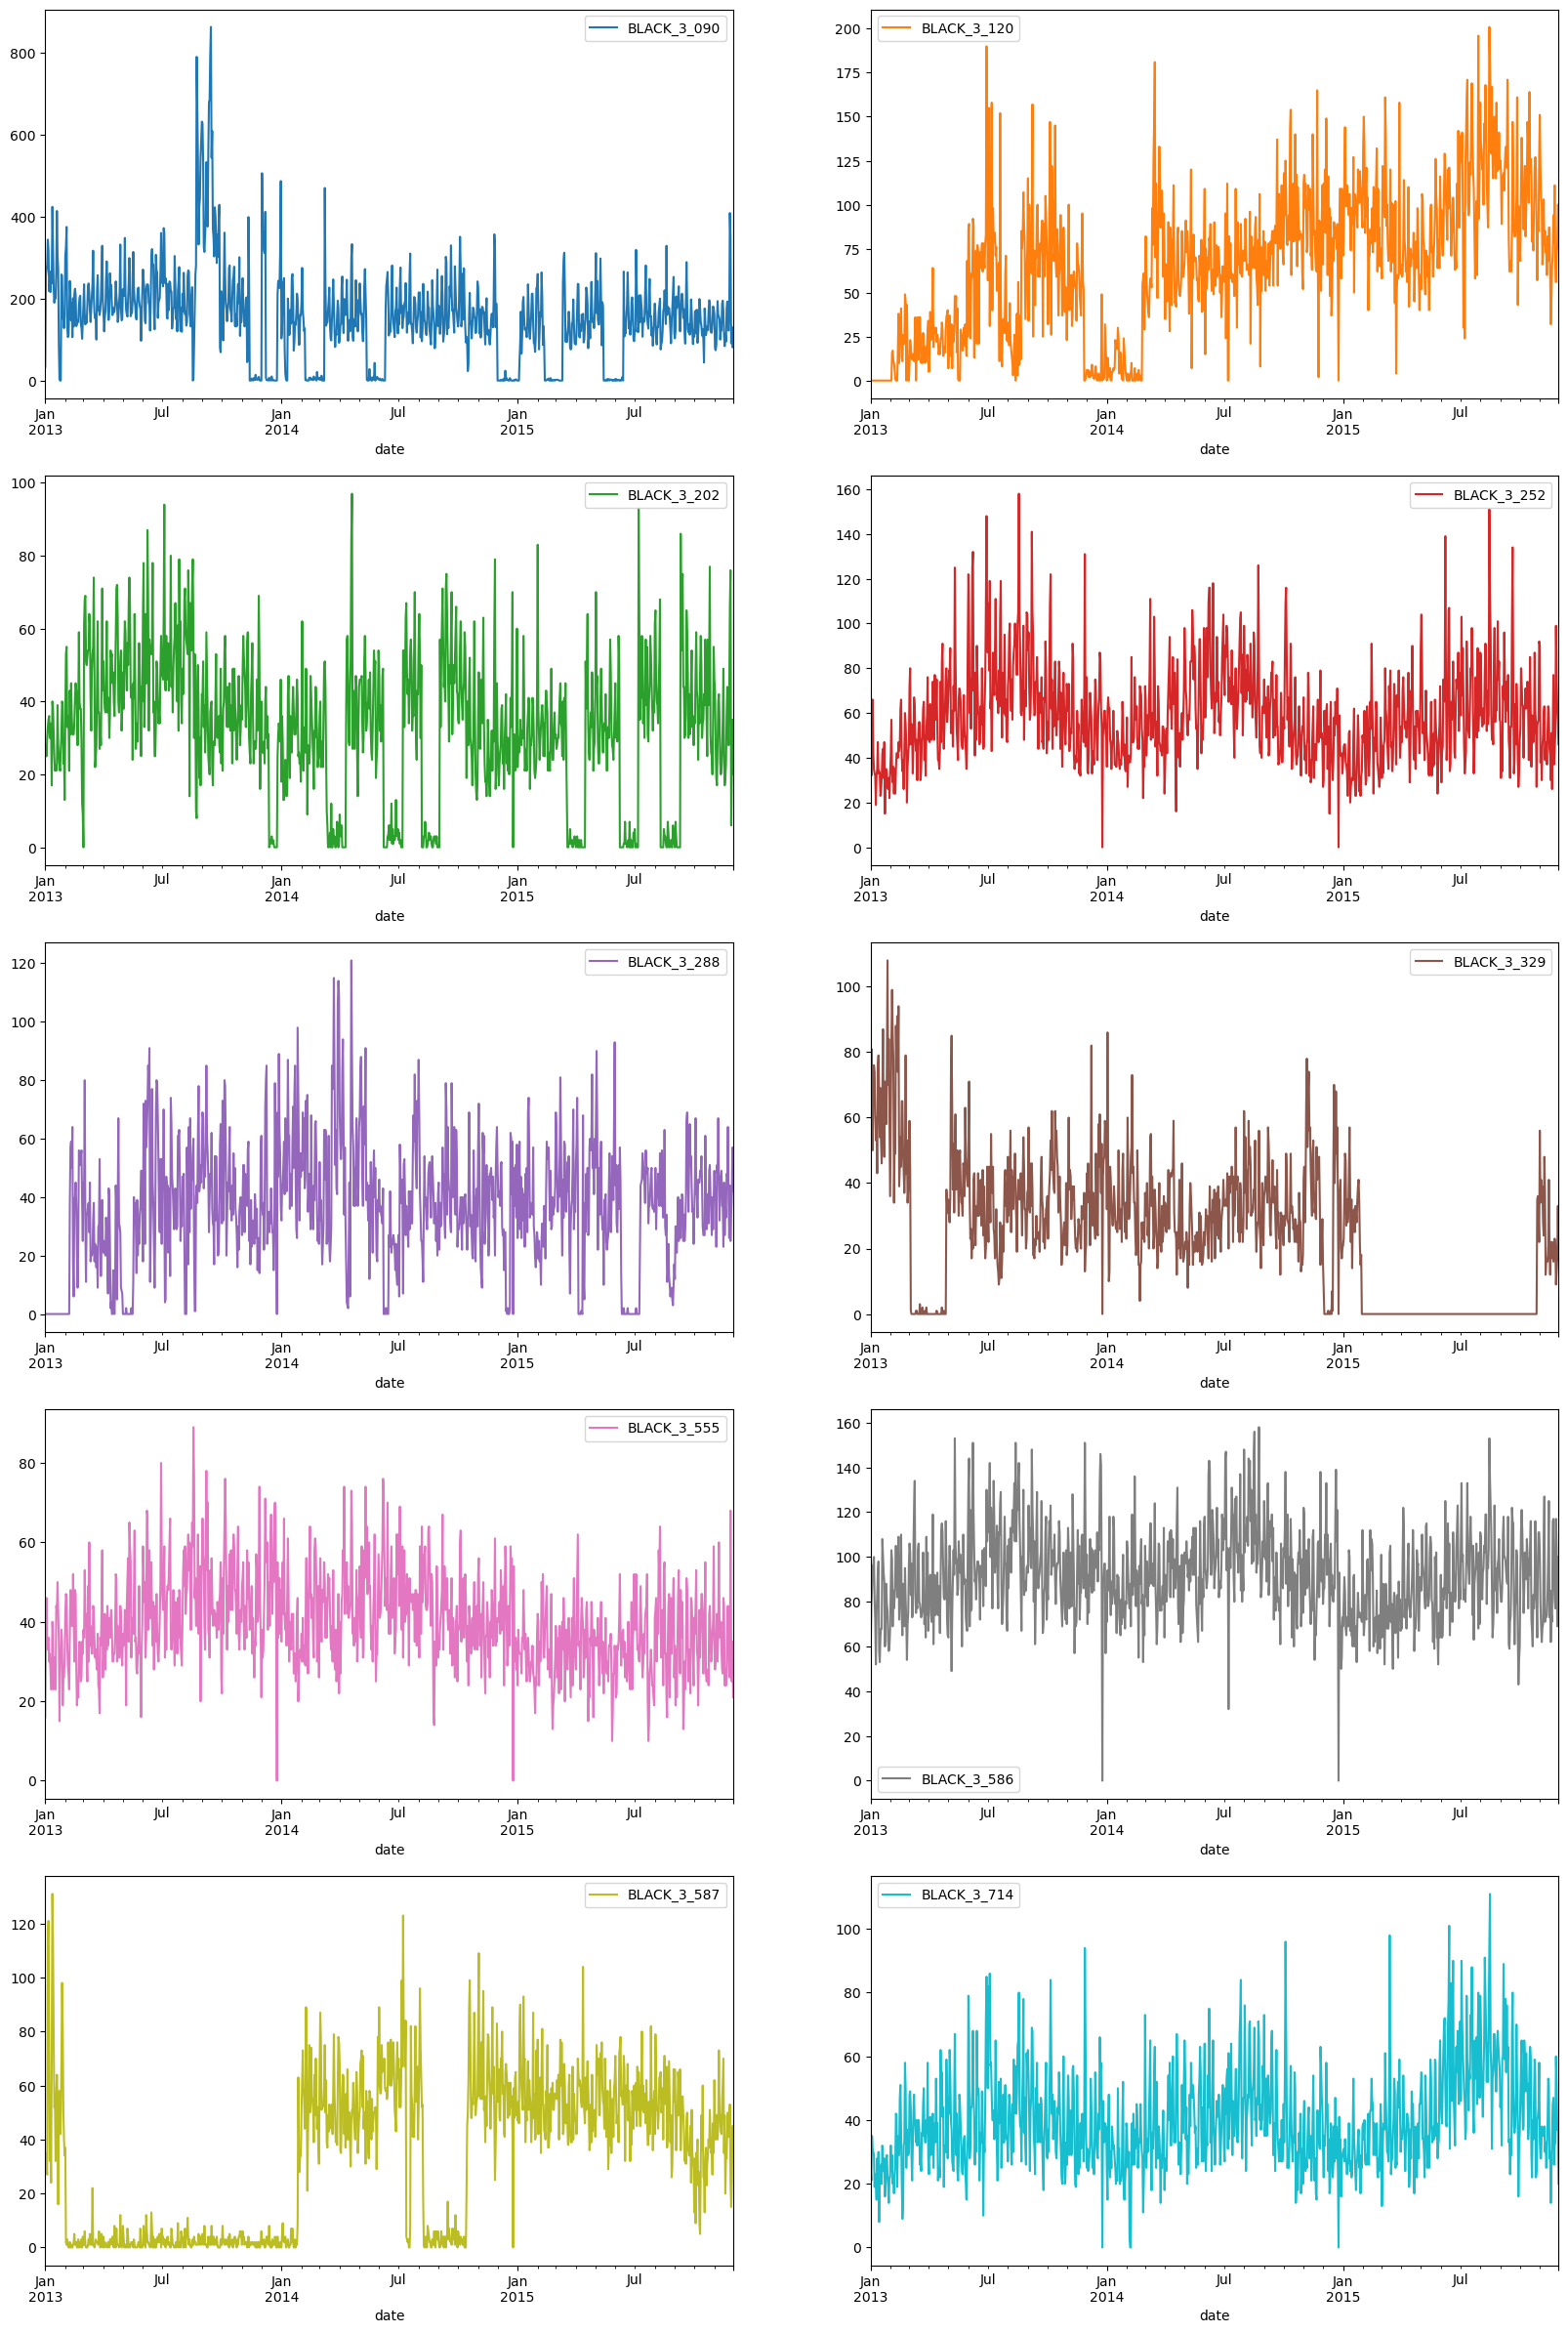

In [17]:
df.groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

#### Tendencia de las ventas por tienda y producto

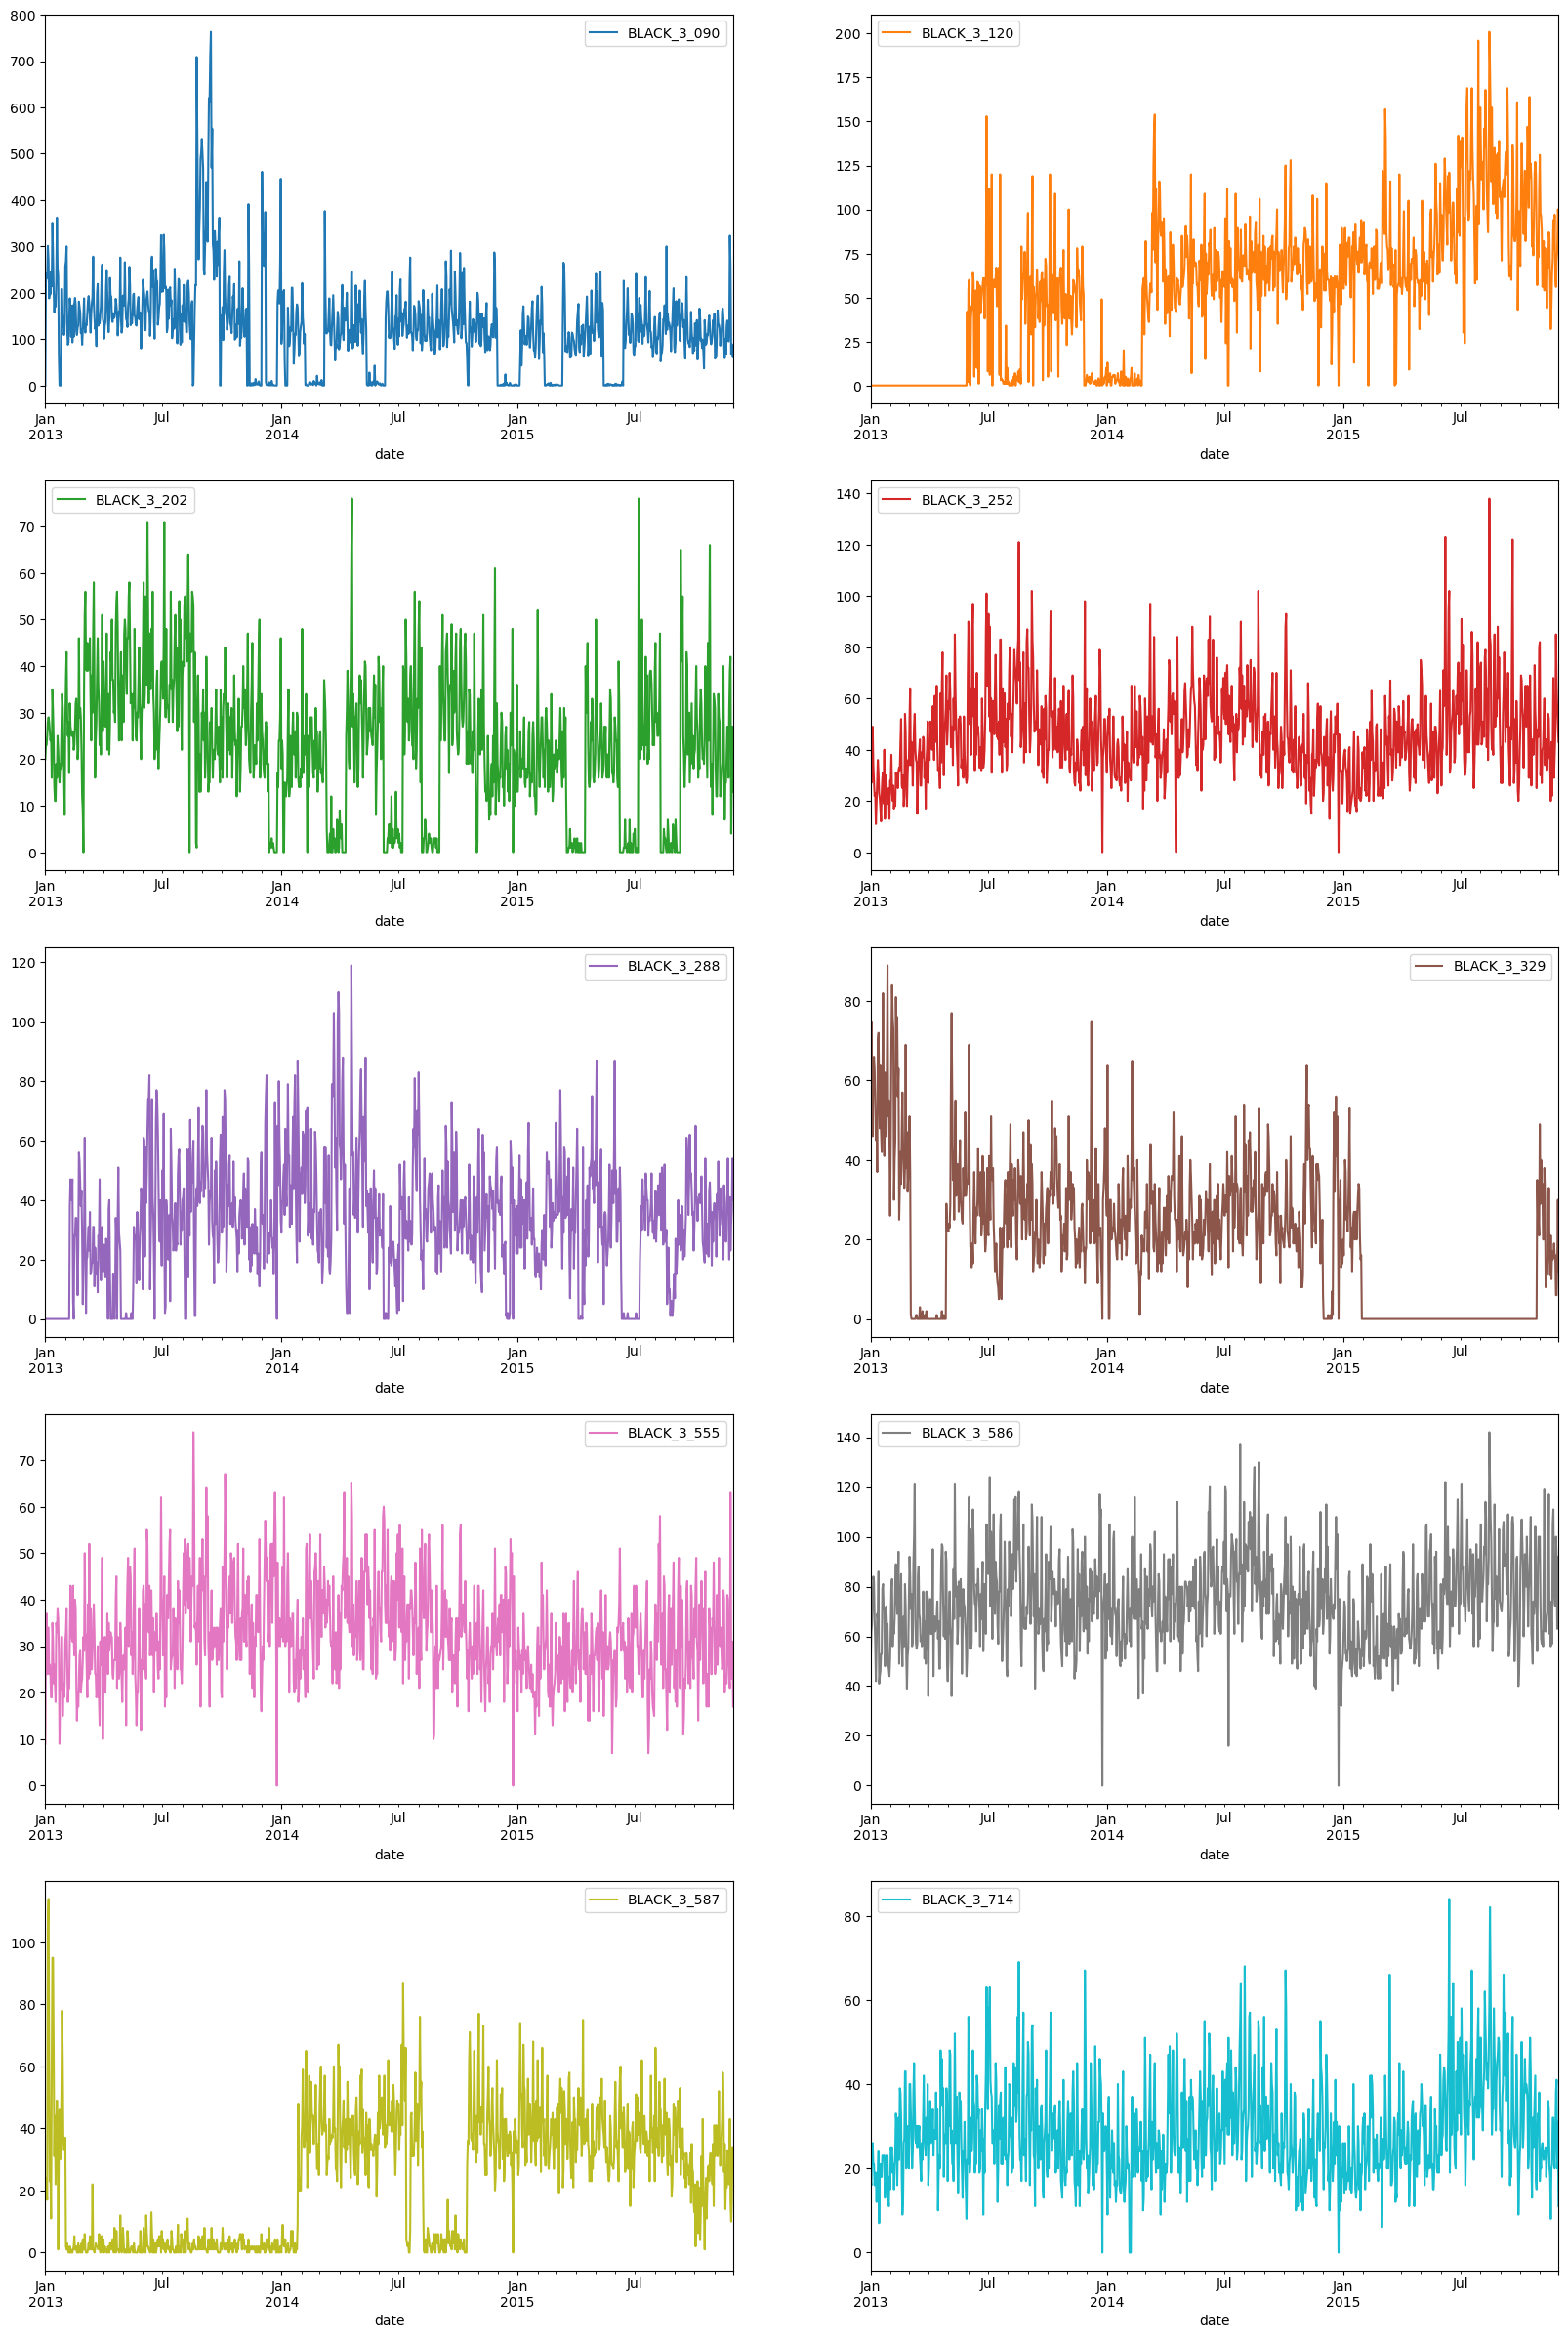

In [18]:
df.loc[df.warehouse_id == 'CA_3'].groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

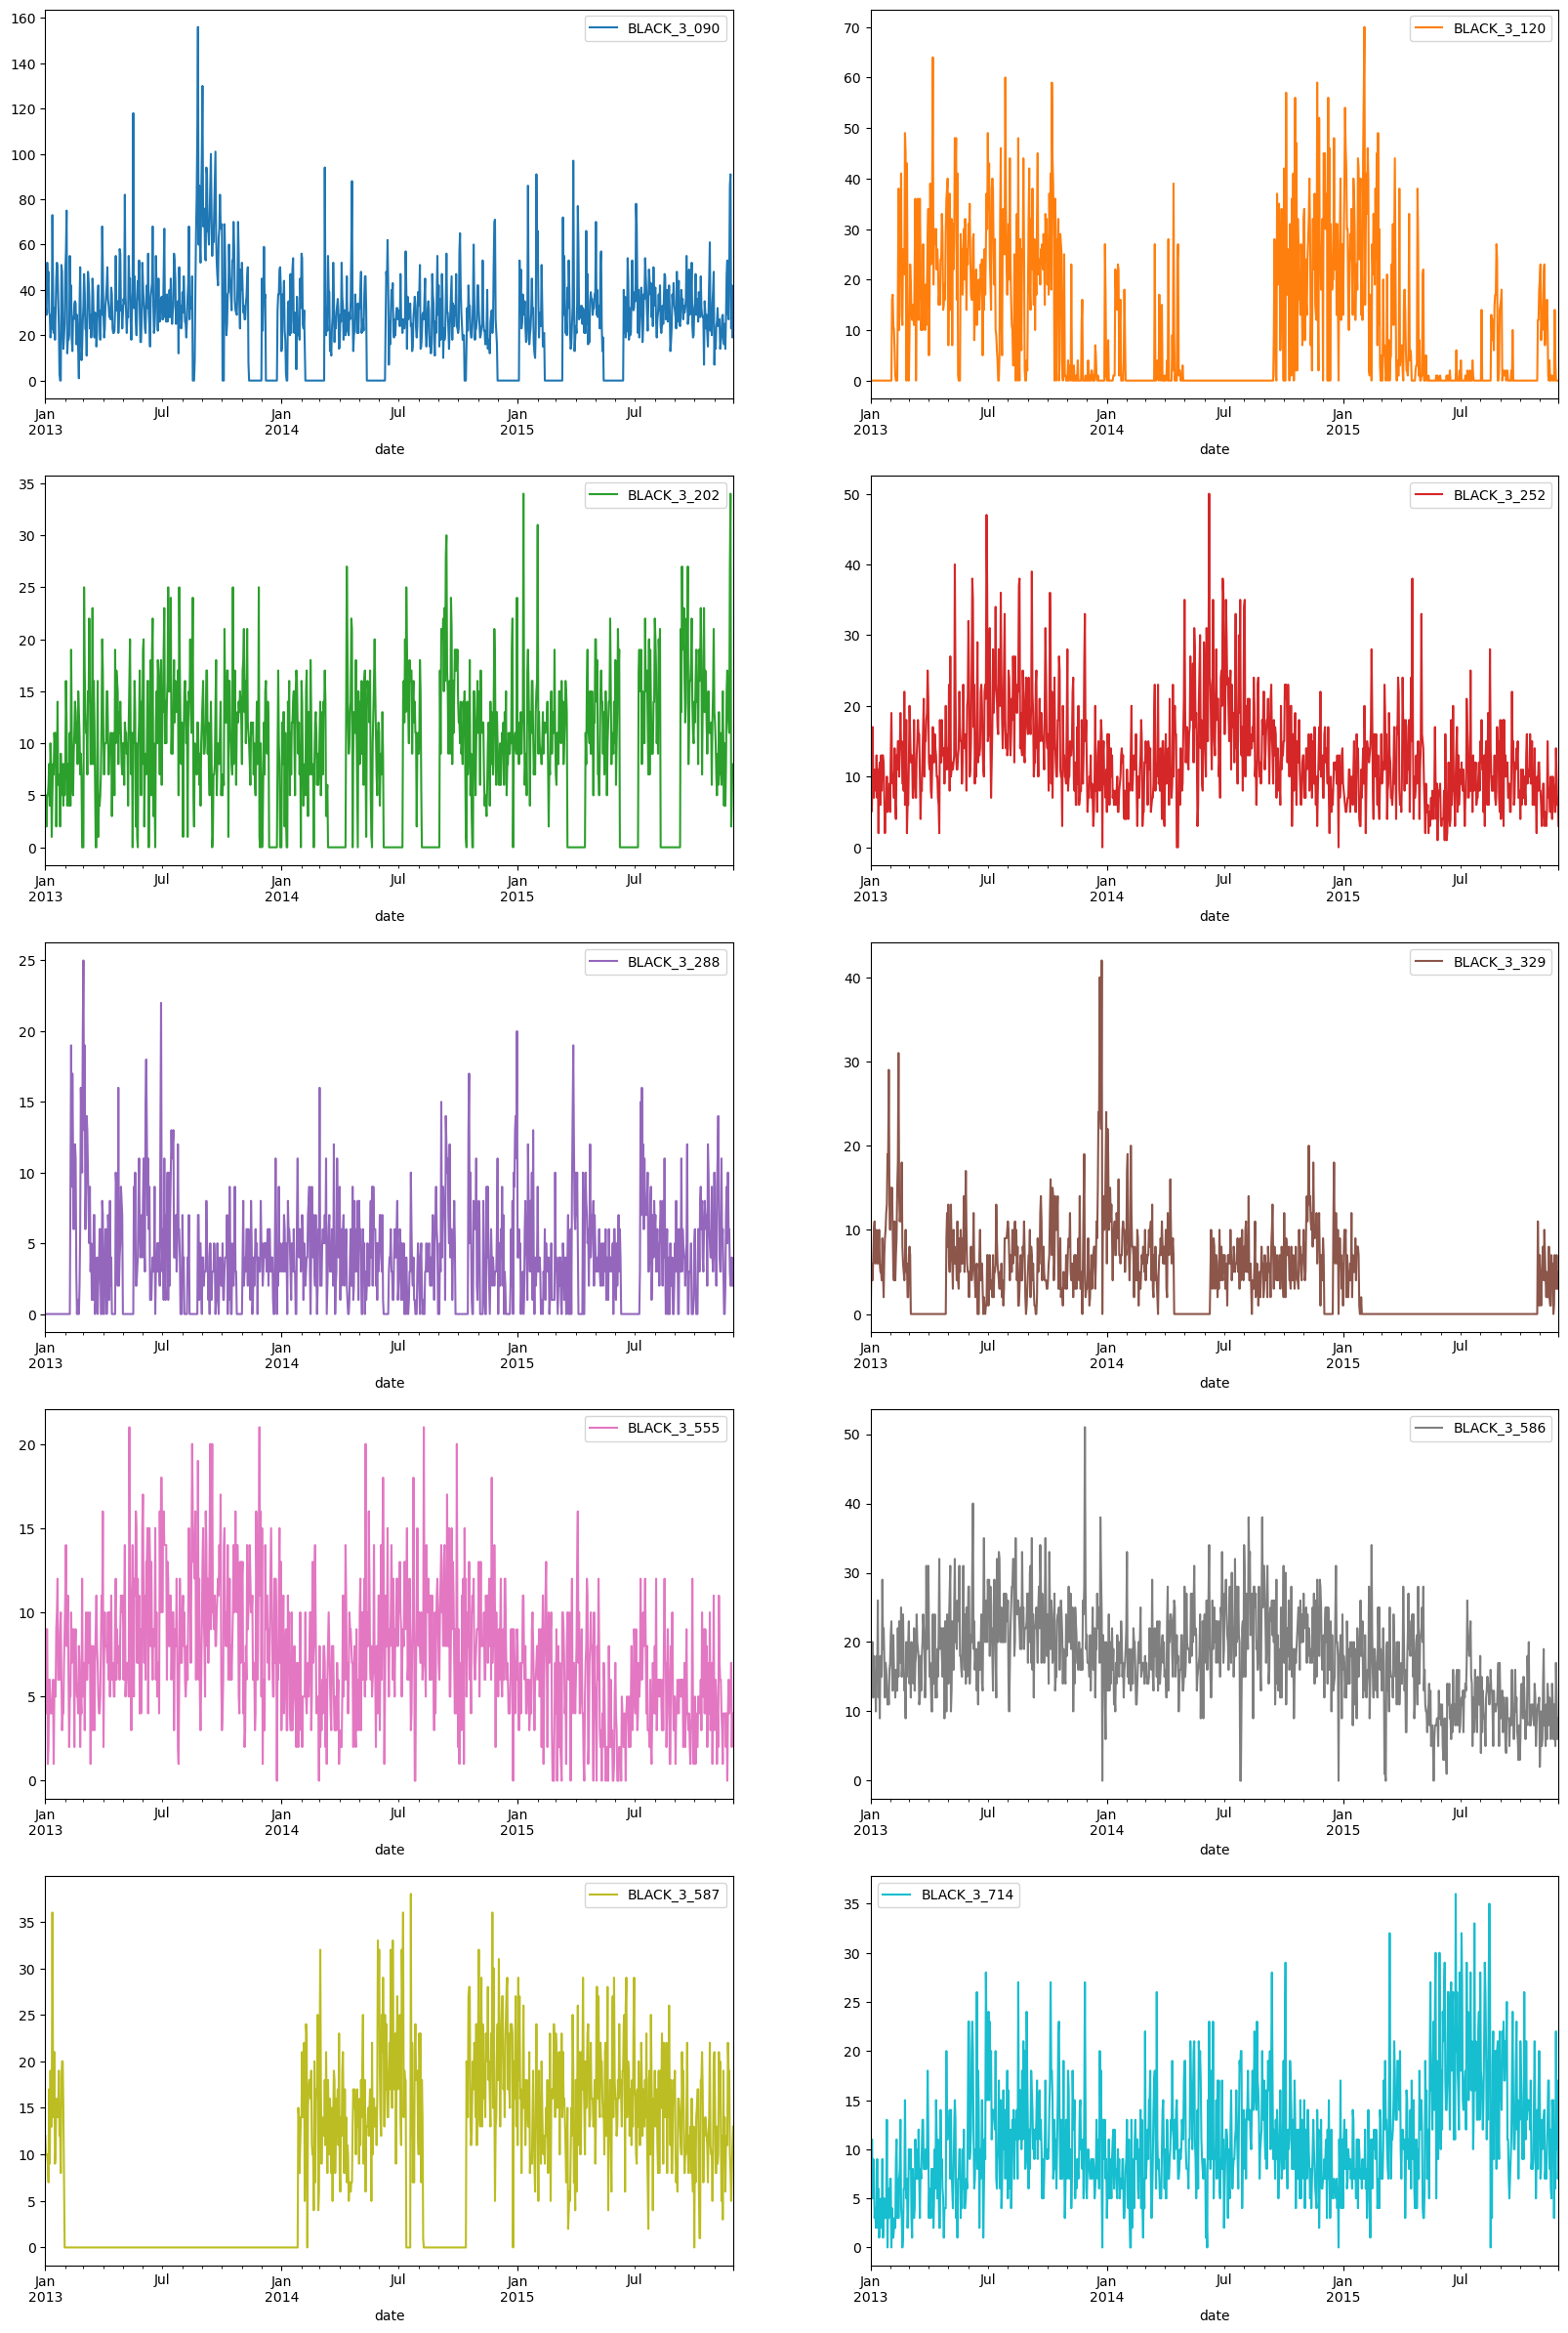

In [21]:
df.loc[df.warehouse_id == 'CA_4'].groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

Conclusiones:

* Estructura jerárquica
* Hay productos nuevos a nivel de tienda
* Aunque no a nivel general, por lo que puedo pensar que no son realmente productos nuevos si no demanda intermitente
* Hay demanda intermitente
    * No se la causa: falta de demanda, retirada del mercado o rotura de stock

Acciones:

* Modelizar a nivel tienda producto
* Crear una variable que capture el efecto de la demanda intermitente
* Utilizar algoritmos basados en árboles y rápidos: XGBoost o lightGBM

#### Tendencia del precio por producto

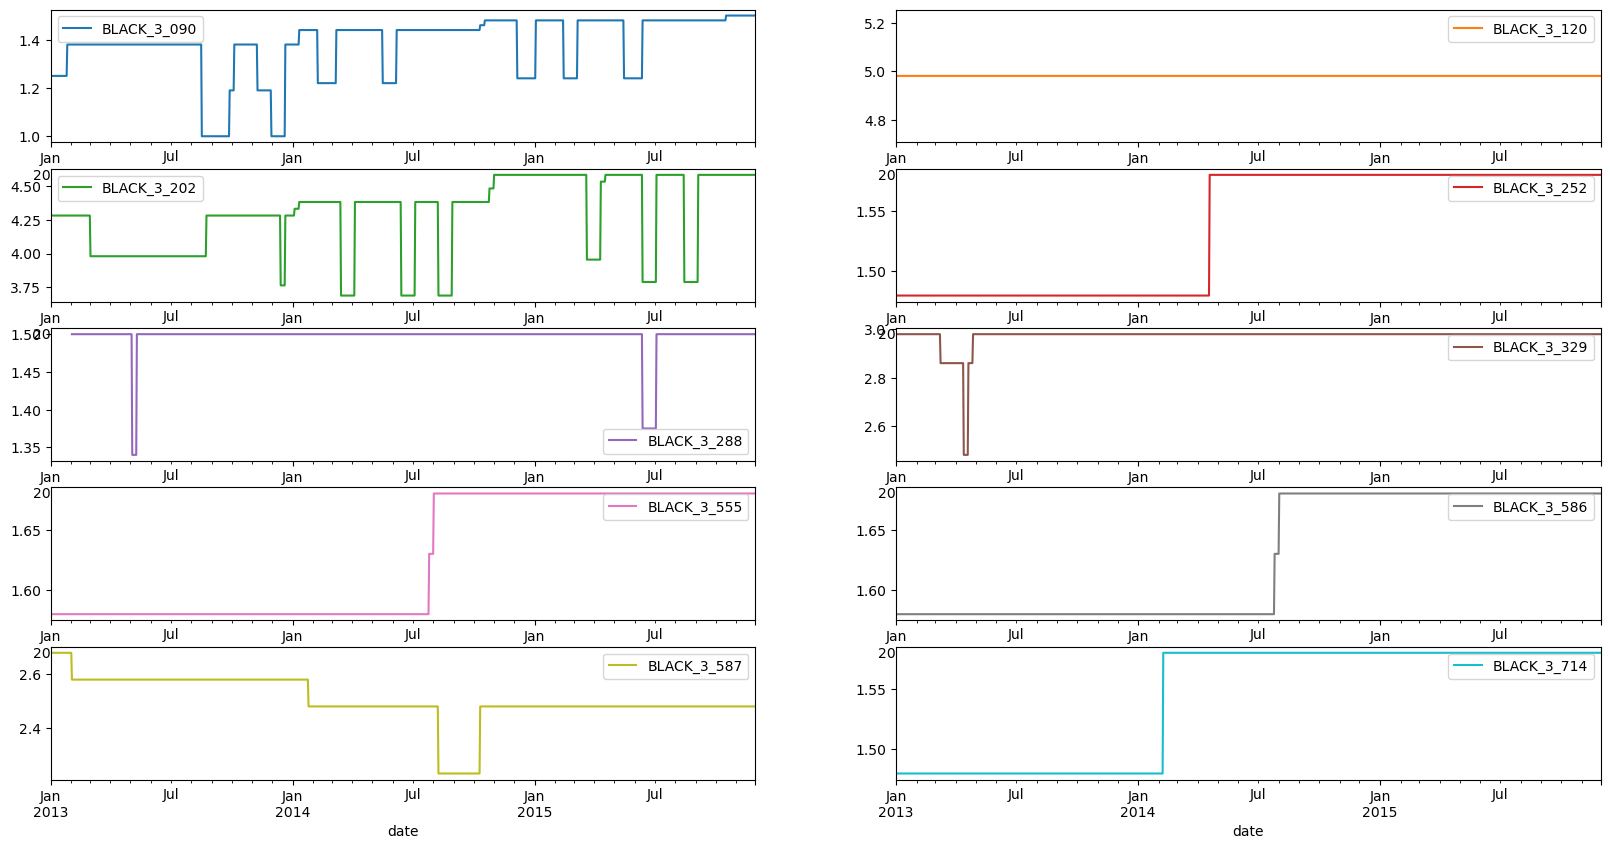

In [23]:
df.groupby(['date','item_id']).sell_price.mean().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,10));

Conclusiones:

* Las políticas de precio varían mucho por producto
* Parece que las promociones son frecuentes
* Sería muy útil disponer de un calendario de promociones

#### Estacionalidad por producto

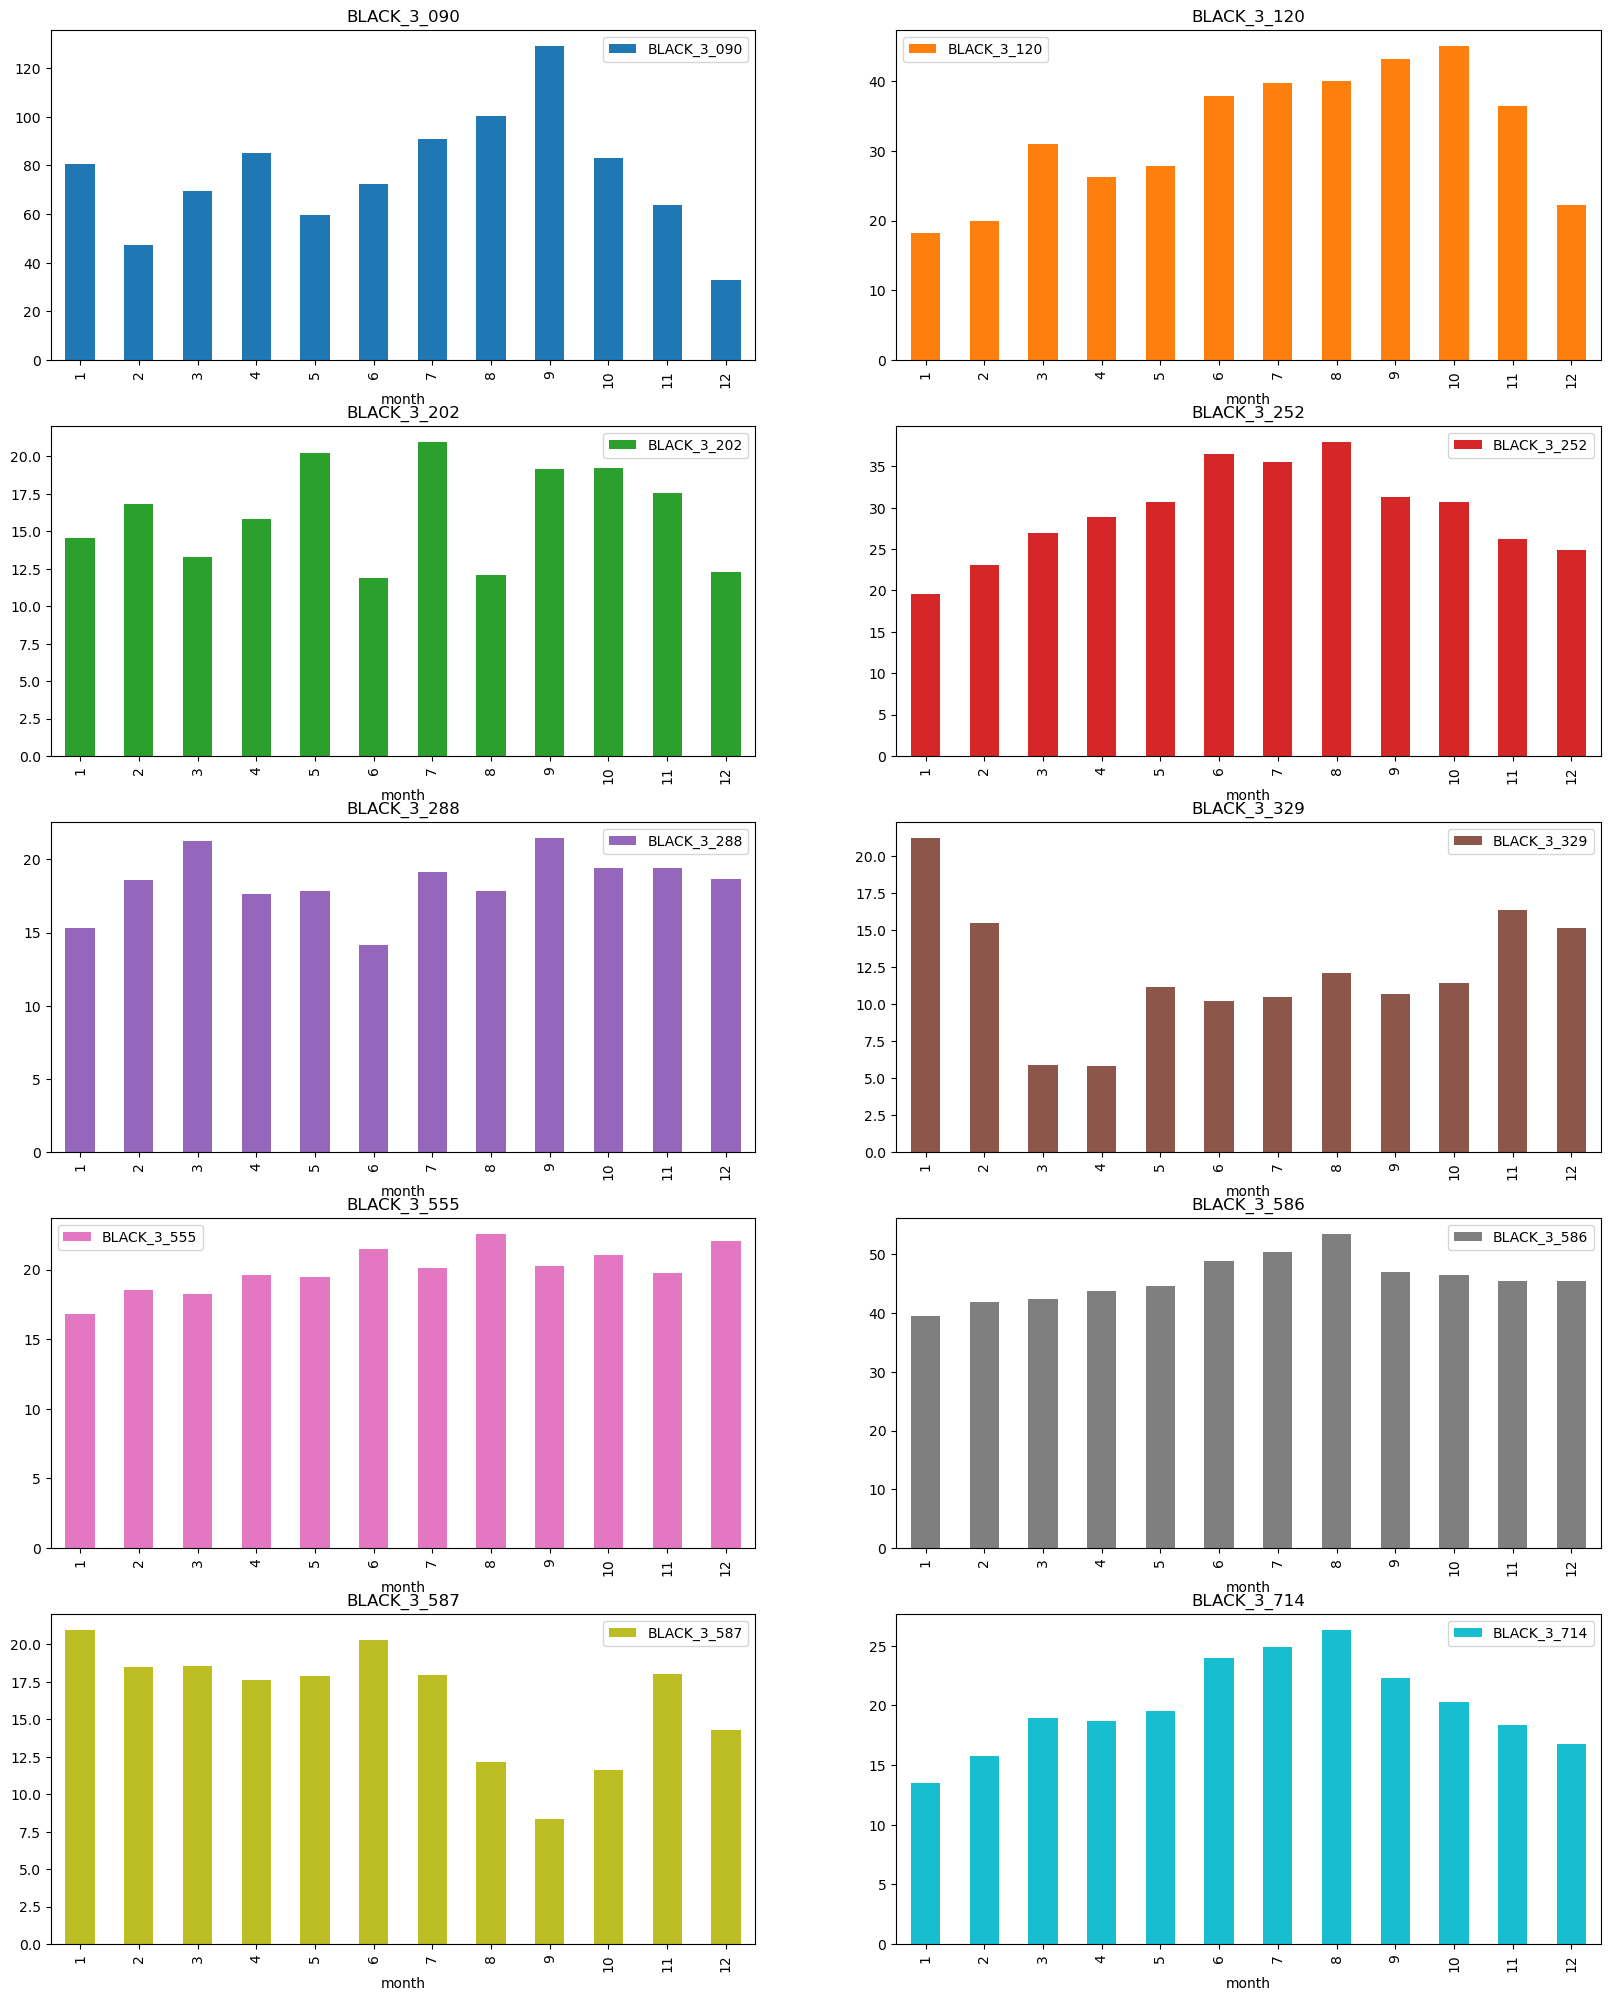

In [22]:
df.groupby(['month','item_id']).ventas.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

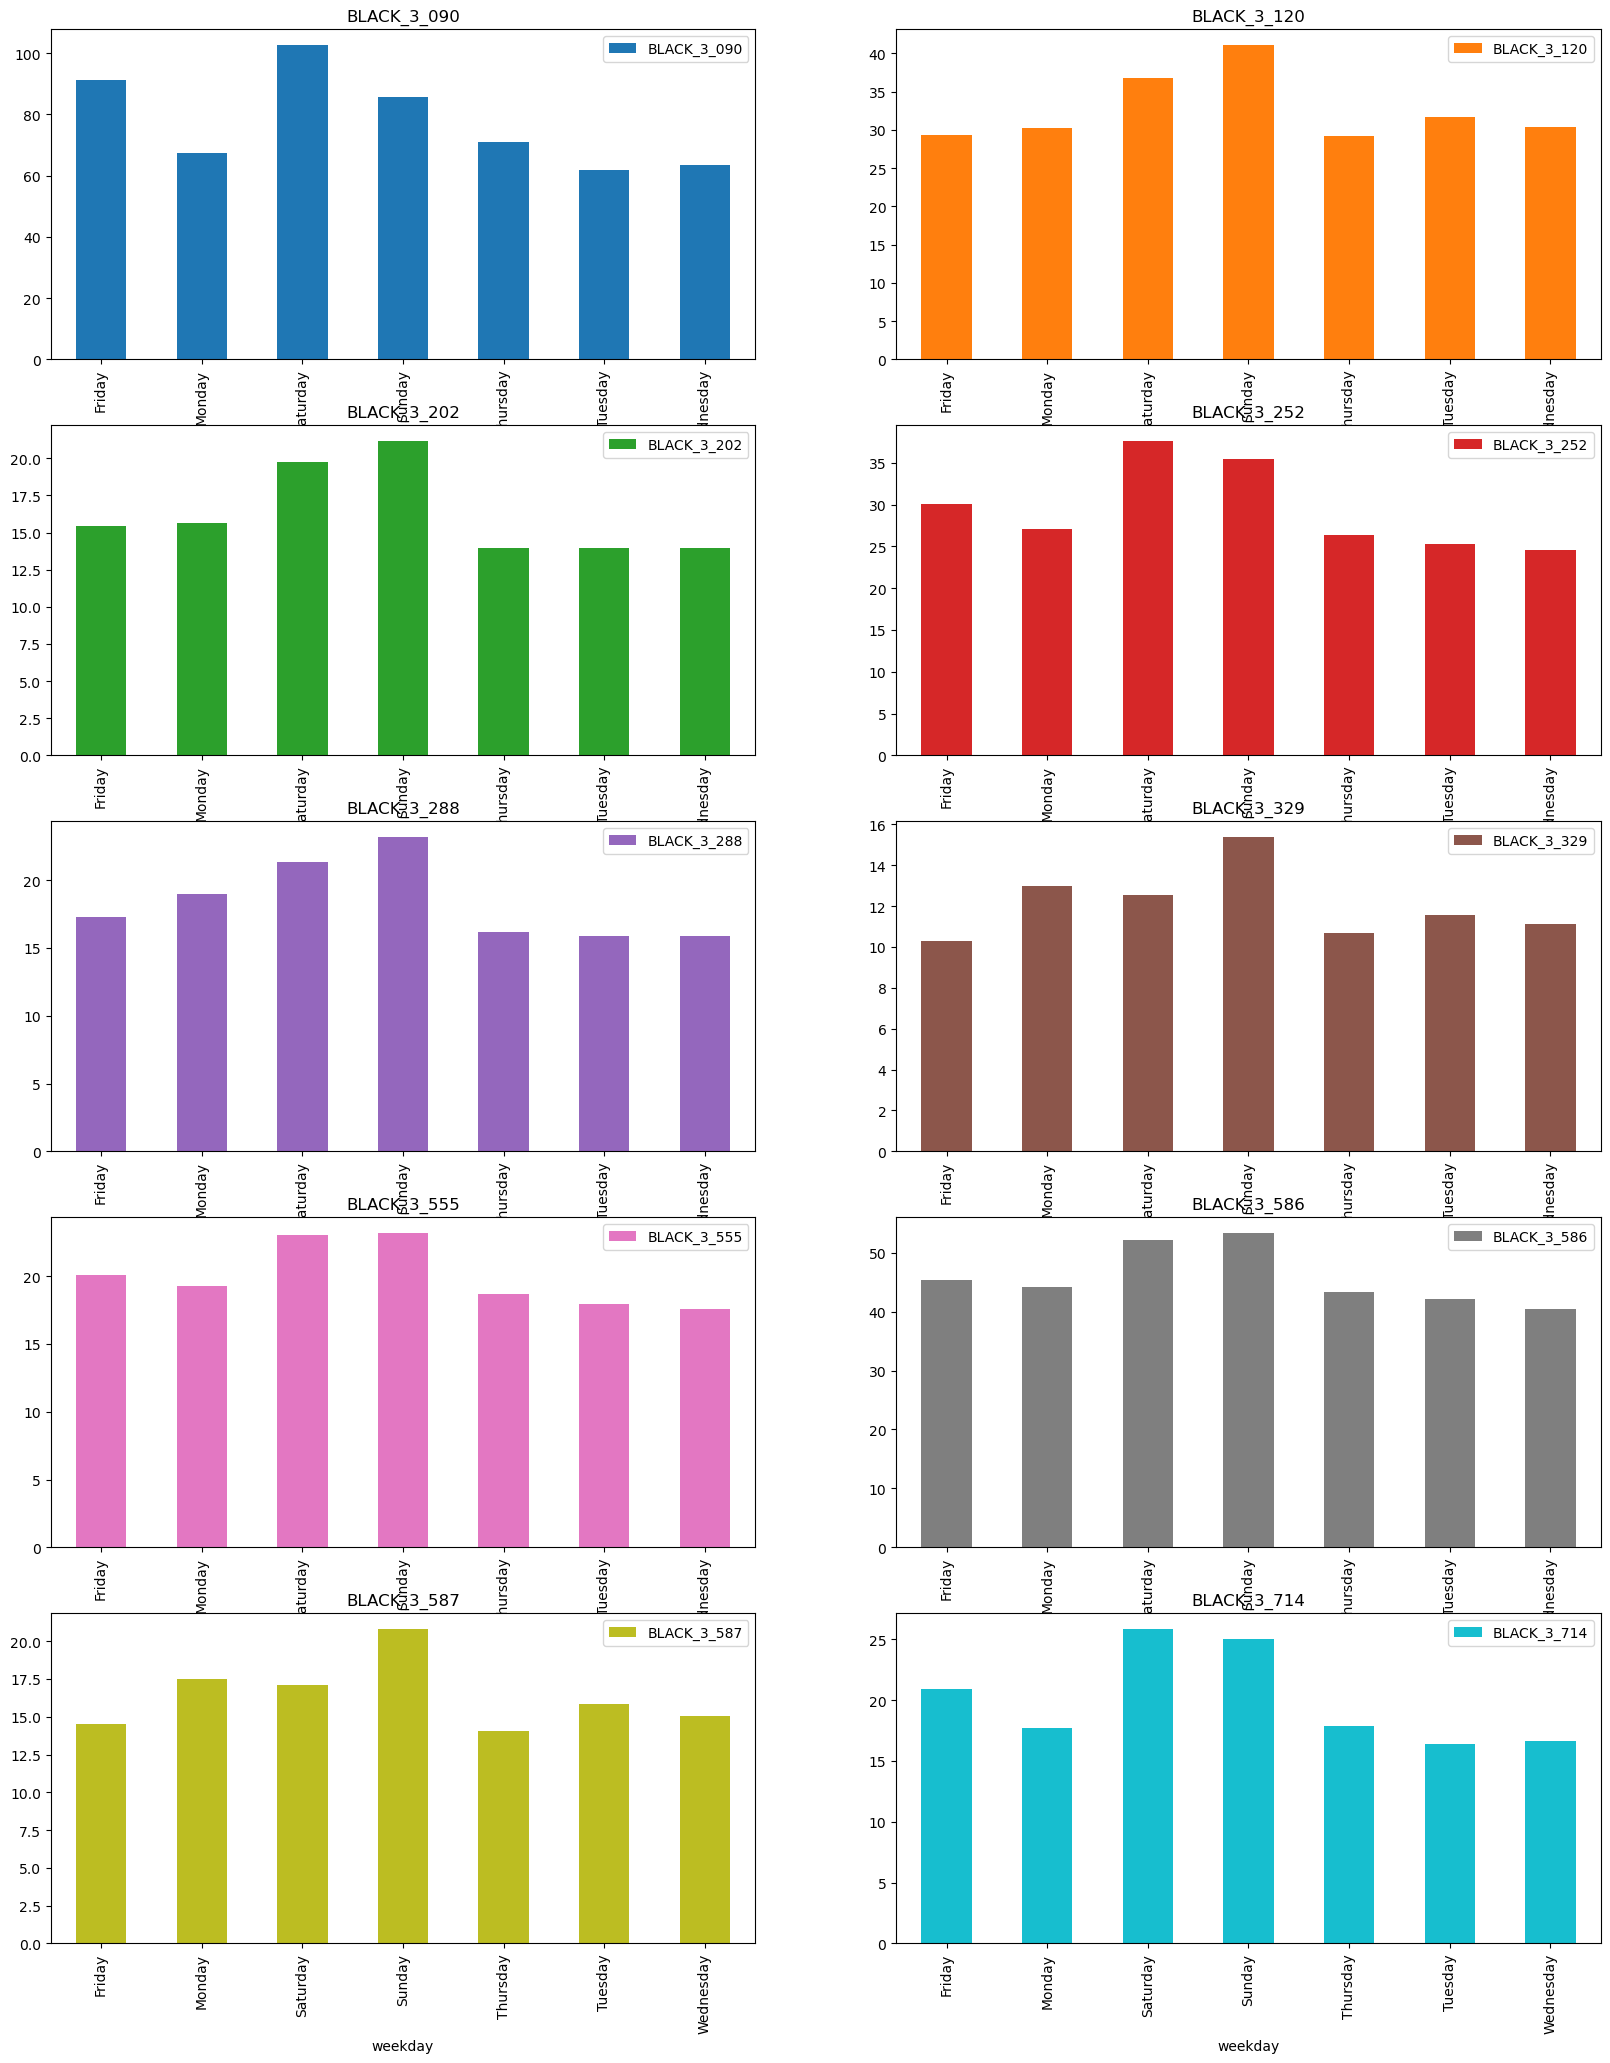

In [24]:
df.groupby(['weekday','item_id']).ventas.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

#### Estacionalidad por evento

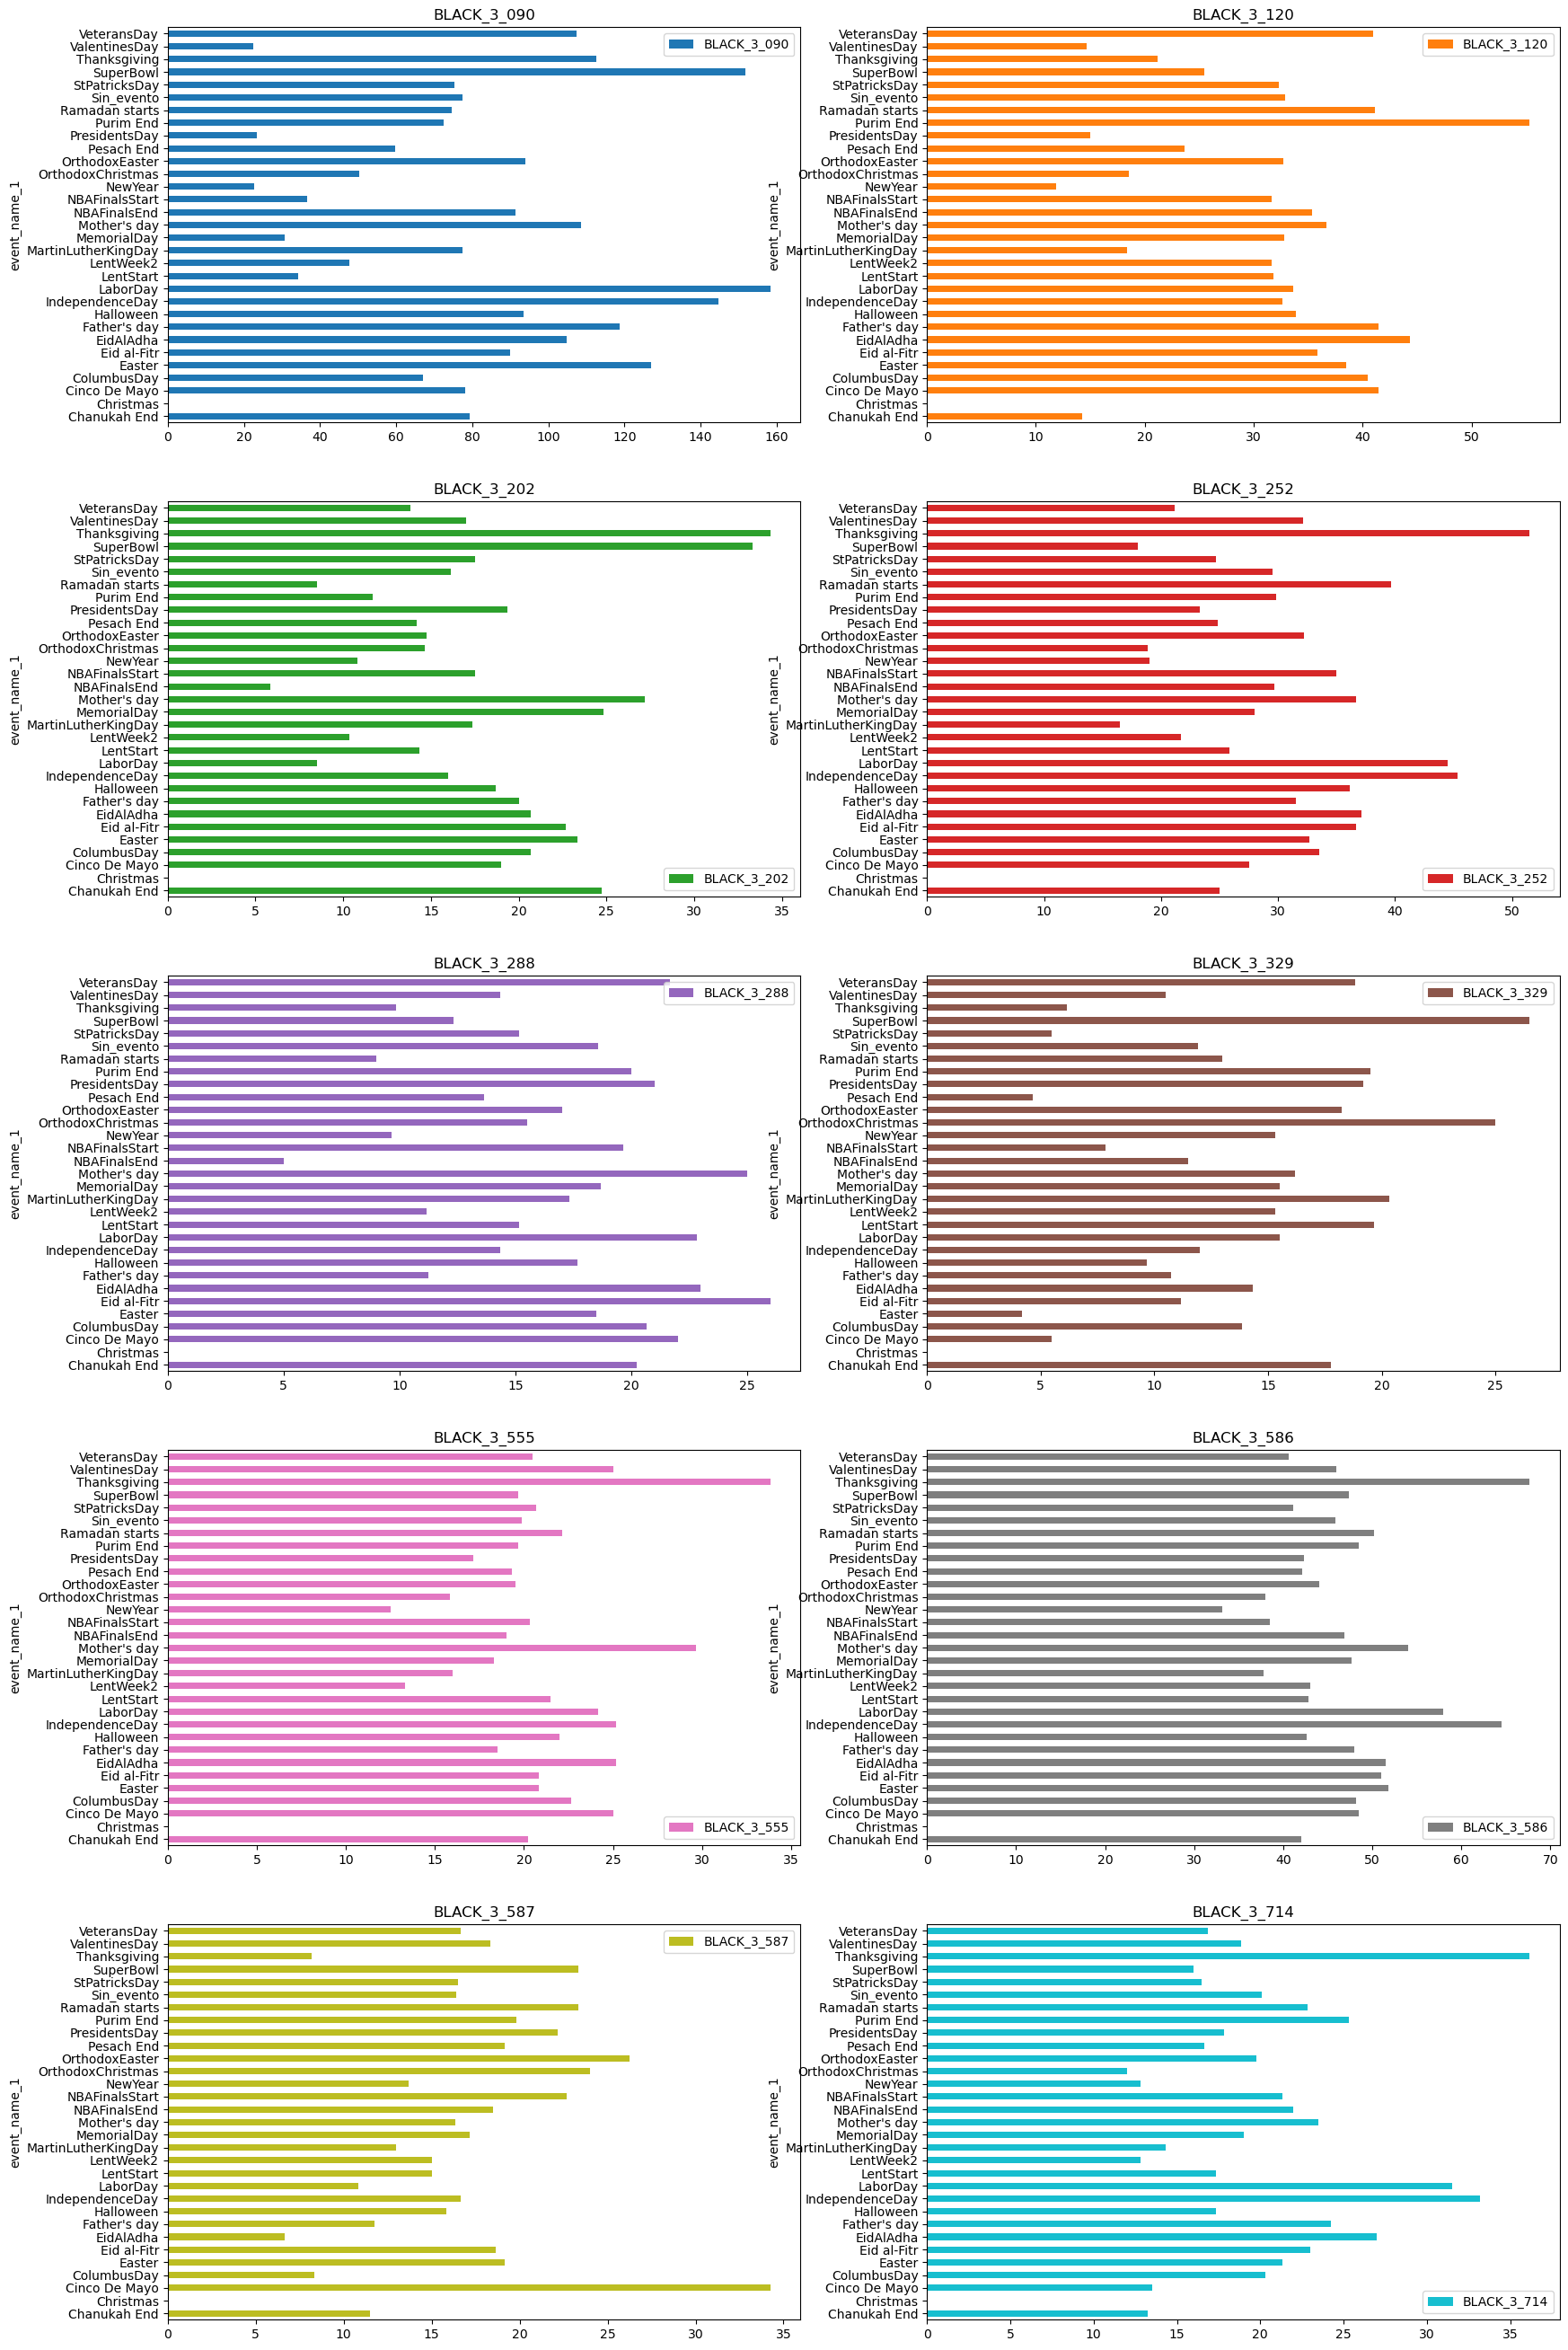

In [25]:
df.groupby(['event_name_1','item_id']).ventas.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

#### Estacionalidad por tipo de evento

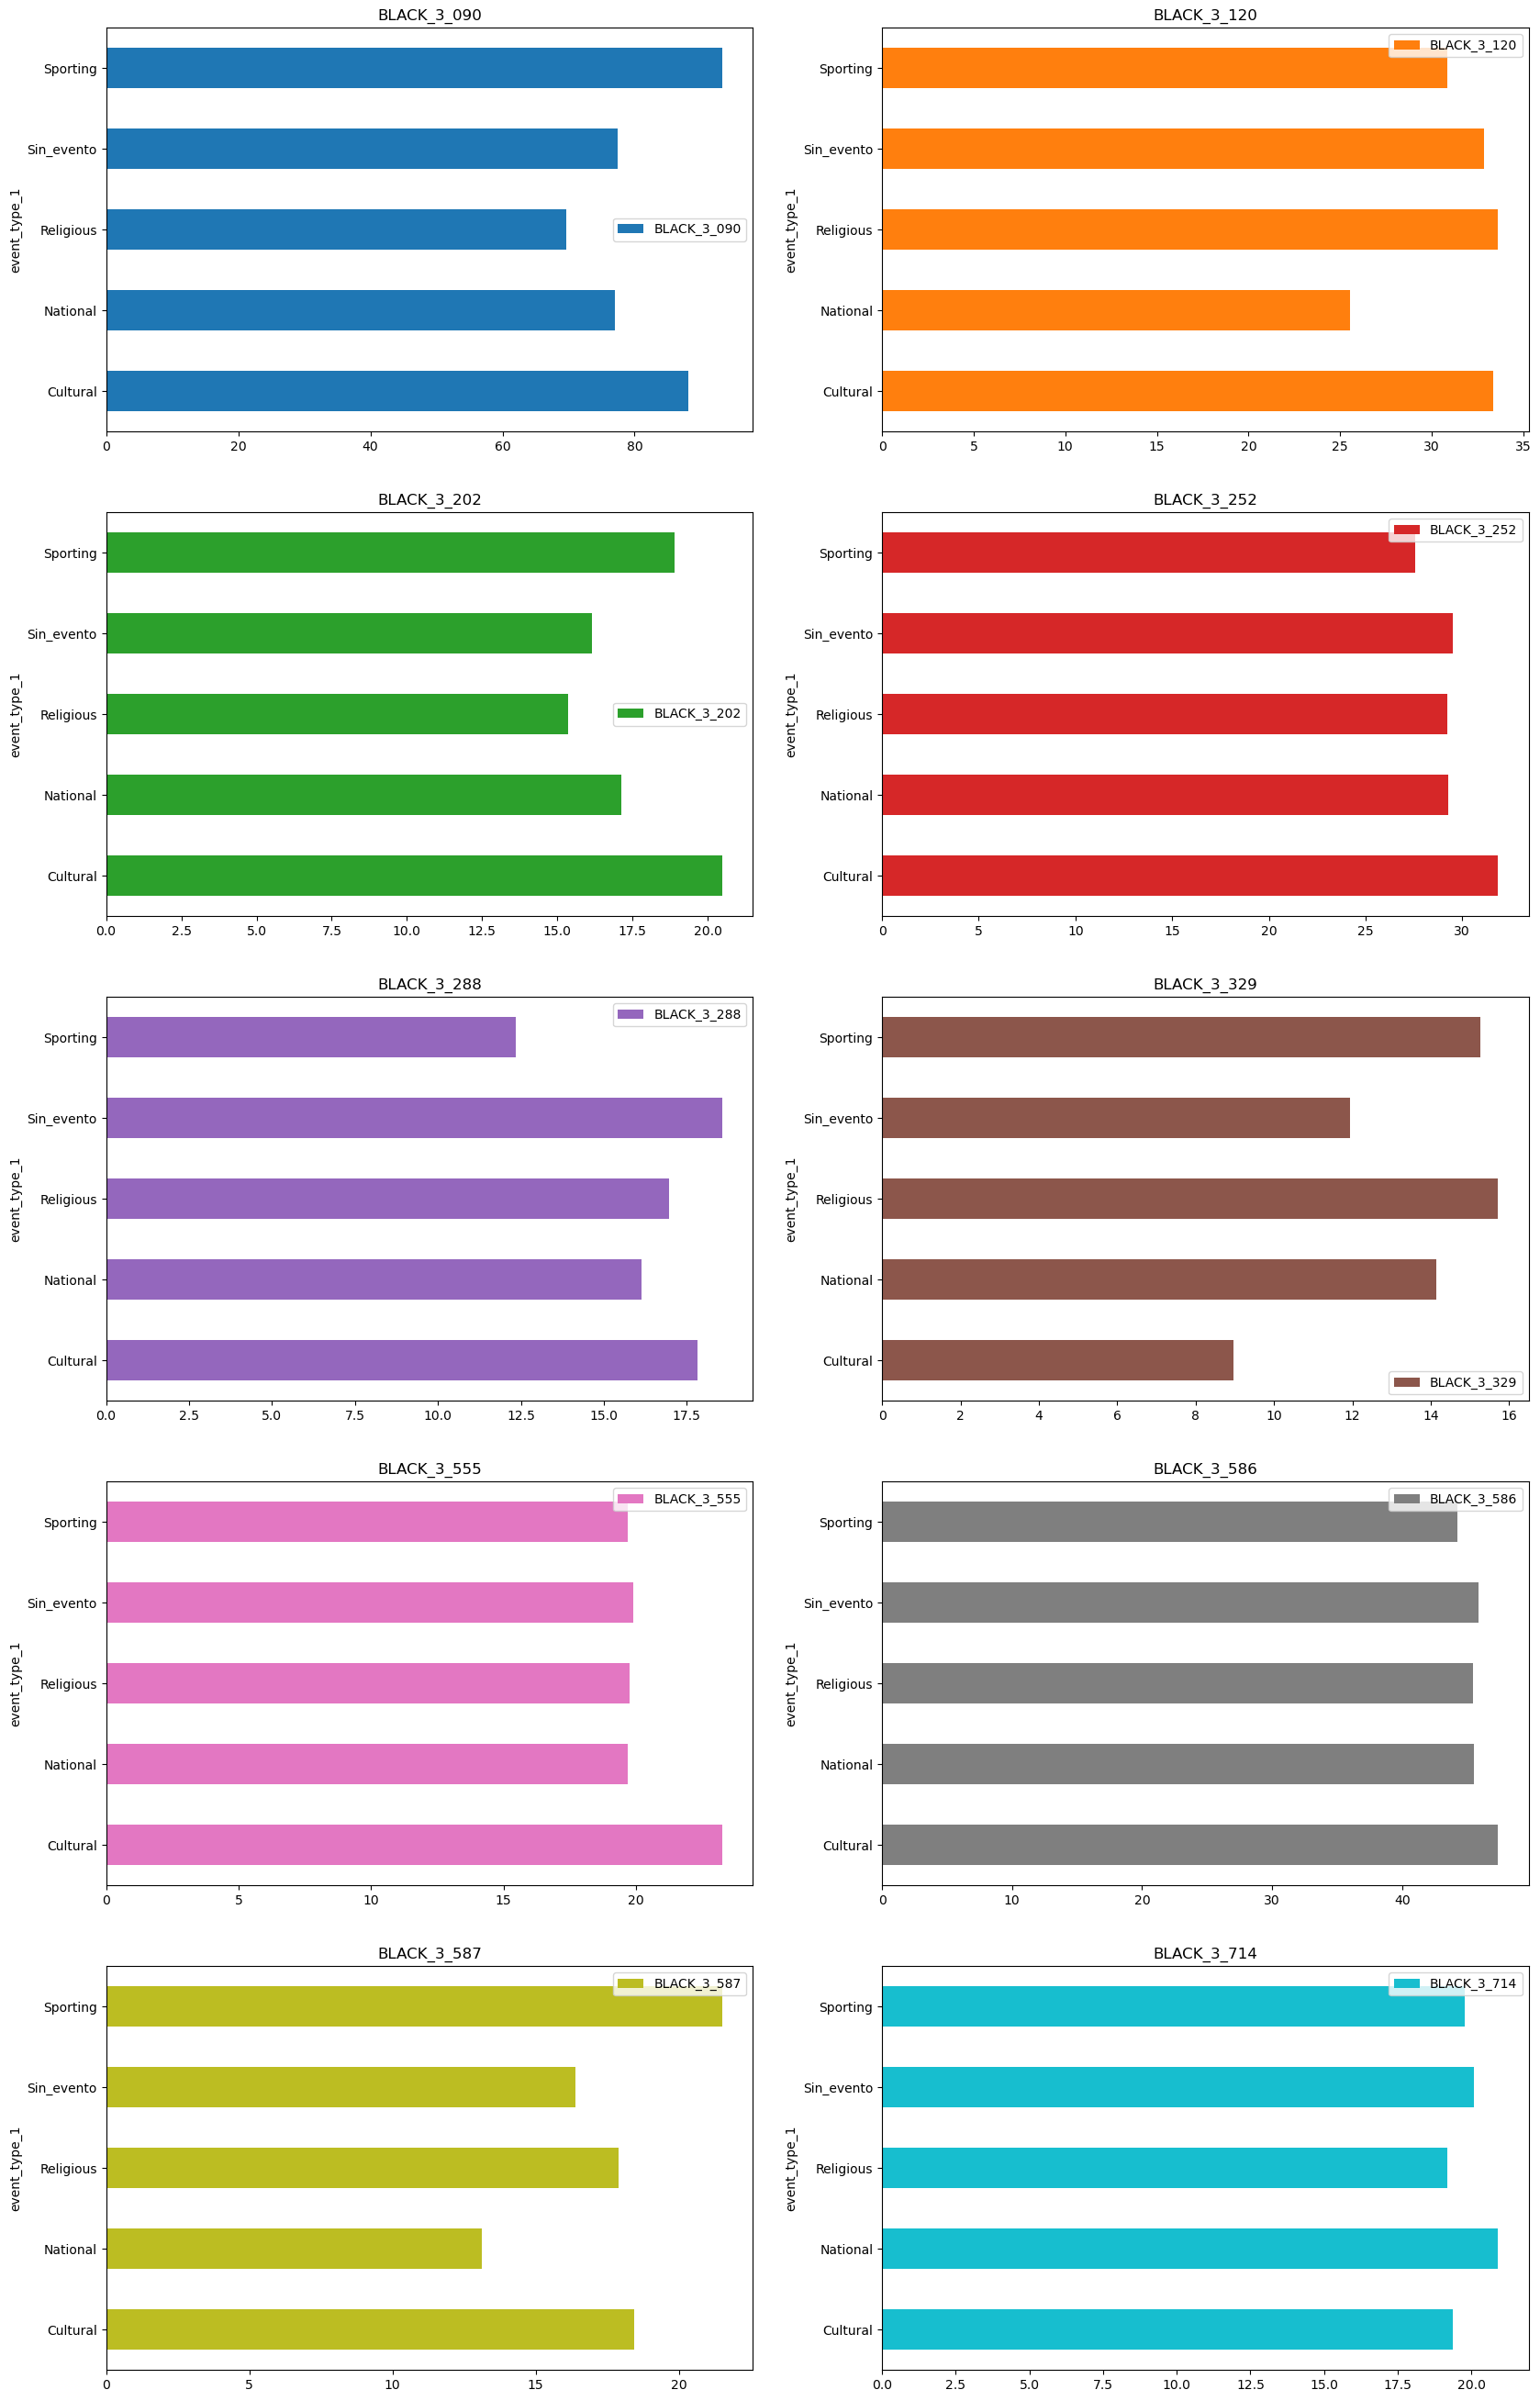

In [26]:
df.groupby(['event_type_1','item_id']).ventas.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

Conclusiones:

* Todas estas variables sí parecen afectar lo cual es buena noticia

## GUARDAR DATASETS TRAS EDA

In [29]:
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [30]:
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)